# **Exploratory Data Analysis Lab**


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


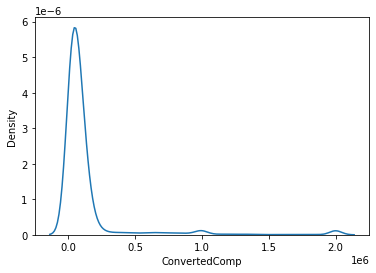

In [10]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

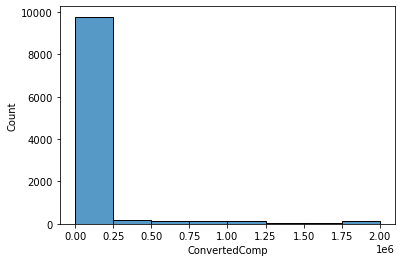

In [17]:
# your code goes here
sns.histplot(df['ConvertedComp'], bins  = 8)

What is the median of the column `ConvertedComp`?


In [18]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [26]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [29]:
print("The number of respondents identifying themselves only as 'Man' are", df["Gender"].eq('Man').sum(), "respondents.")

The number of respondents identifying themselves only as 'Man' are 10480 respondents.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [34]:
# your code goes here
df[df["Gender"] == "Woman"].median()["Respondent"]

C:\Users\User\AppData\Local\Temp/ipykernel_5360/3209811739.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Gender"] == "Woman"].median()["Respondent"]


11973.0

In [35]:
df[df["Gender"] == "Woman"].describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,731.000000,6.790000e+02,6.790000e+02,725.000000,574.000000,719.000000
mean,12056.265390,6.622998e+05,1.011031e+05,41.367586,4.797038,29.670376
std,7239.147623,5.071550e+06,2.202510e+05,20.803268,4.562558,6.805380
min,71.000000,4.000000e+00,0.000000e+00,8.000000,0.500000,18.000000
25%,5797.000000,2.500000e+04,2.654650e+04,40.000000,2.000000,25.000000
50%,11973.000000,6.500000e+04,5.770800e+04,40.000000,4.000000,28.000000
75%,18252.500000,1.100000e+05,9.500000e+04,40.000000,5.000000,32.000000
max,25120.000000,7.500000e+07,2.000000e+06,375.000000,50.000000,62.000000


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [36]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


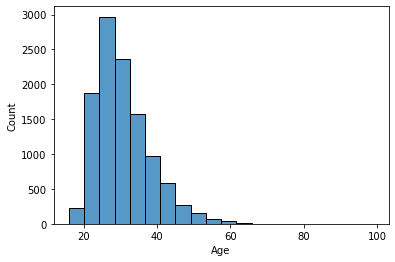

In [44]:
# your code goes here
sns.histplot(df["Age"], bins = 20)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


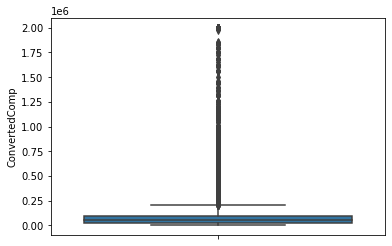

In [46]:
# your code goes here
sns.boxplot(y = df["ConvertedComp"])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [50]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
print(f"The Inter Quartile Range is {IQR}")

The Inter Quartile Range is 73132.0


Find out the upper and lower bounds.


In [52]:
# your code goes here
Upper_bound = Q3 + (IQR * 1.5)
Lower_bound = Q1 - (IQR * 1.5)
print(Upper_bound, Lower_bound)

209698.0 -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [60]:
# your code goes here
outliers = (df["ConvertedComp"] < Lower_bound) | (df["ConvertedComp"] > Upper_bound)
outliers.value_counts()

False    10519
True       879
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [80]:
# your code goes here
df2 = df["ConvertedComp"].clip(Upper_bound, Lower_bound)
df2.describe()

count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

In [78]:
median = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median()
print(f"The median after removing outliers is {median}.")

The median after removing outliers is 52704.0.


In [89]:
mean = df[df["ConvertedComp"].le(Q3 + 1.5 * IQR)]["ConvertedComp"].mean()
print(f"The mean after removing outliers is {mean}.")

The mean after removing outliers is 59883.20838915799.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [70]:
# your code goes here
df.corr()["Age"]

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


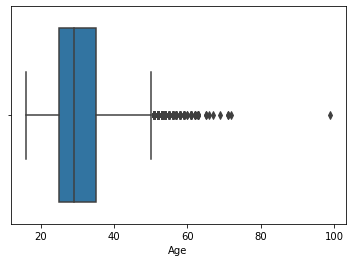

In [83]:
sns.boxplot(df["Age"])
plt.show()